# opencv 머신러닝  
  
## 1. opencv 머신 러닝 API   
    
### 머신 러닝 알고리즘 객체 생성  
cv2.ml.ANN_MLP_create() -> retval  
cv2.ml.KNearest_create() -> retval  
cv2.ml.SVM_create() -> retval  
...  

retval: 각 머신 러닝 알고리즘 객체  
  
### 머신 러닝 알고리즘 학습  
cv2.ml_StatModel.train(samples, layout, responses) -> retval
  
samples: 학습 데이터 행렬. numpy.ndarray. shape=(N, d), dtype=numpy.float32  
layout: 학습 데이터 배치 방법  
=>cv2.ROW_SAMPLE: 하나의 데이터가 한 행으로 구성됨  
  cv2.COL_SAMPLE: 하나의 데이터가 한 열로 구성됨  
responses: 각 학습 데이터에 대응되는 응답(레이블) 행렬. numpy.ndarray. shape=(N, 1), dtype=numpy.int32 또는 numpy.float32  
retval: 학습이 성공하면 True  

### 머신 러닝 알고리즘 예측  
cv2.ml_StatModel.predict(samples, results=None, flags=None) -> retval, results  
  
samples: 입력 벡터가 행 단위로 저장된 행렬. 
numpy.ndarray. shape=(N, d), dtype=numpy.float32  
results: 각 입력 샘플에 대한 예측(분류 또는 회귀) 결과를 저장한 행렬. numpy.ndarray. shape=(N, ) 또는 (N, 1). dtype=numpy.int32 또는 numpy.float32  
flags: 추가적인 플래그. 기본값은 0. 
cv2.ml.STAT_MODEL_RAW_OUTPUT을 지정하면 클래스 레이블이 아닌
실제 계산 결과 값을 출력  
retval: 알고리즘에 따라 다름  
  
## 2. k 최근접 이웃 알고리즘  
### k 최근접 이웃(kNN, k-Nearest Neighbor) 알고리즘이란?  
• 특징 공간에서 테스트 데이터와 가장 가까이 있는 K개의 학습 데이터를 찾아 분류 또는 회귀를 수행하는 지도 학습 알고리즘의 하나  
  
  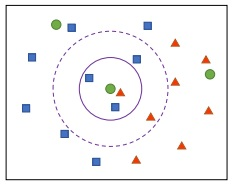
  
### KNN 알고리즘 객체 생성  
cv2.ml.KNearest_create() -> retval  
  
retval: cv2.ml_KNearest 객체  
  
### KNN 알고리즘으로 입력 데이터의 클래스 예측  
cv.ml_KNearest.findNearest(samples, k, results=None,
neighborResponses=None, dist=None , flags=None)
-> retval, results, neighborResponses, dist  
  
samples: 입력 벡터가 행 단위로 저장된 입력 샘플 행렬.
numpy.ndarray. shape=(N, d), dtype=numpy.float32  
k: 사용할 최근접 이웃 개수  
results: 각 입력 샘플에 대한 예측(분류 또는 회귀) 결과를 저장한 행렬. numpy.ndarray. shape=(N, 1), dtype=numpy.float32  
neighborResponses: 예측에 사용된 k개의 최근접 이웃 클래스 정보 행렬.
numpy.ndarray. shape=(N, k), dtype=numpy.float32  
dist: 입력 벡터와 예측에 사용된 k개의 최근접 이웃과의 거리를 저장한 행렬. numpy.ndarray. shape=(N, k), dtype=numpy.float32  
retval: 입력 벡터가 하나인 경우에 대한 응답  

In [5]:
import numpy as np
import cv2


def on_k_changed(pos):
    global k_value

    k_value = pos
    if k_value < 1:
        k_value = 1

    trainAndDisplay()


def addPoint(x, y, c):
    train.append([x, y])
    label.append([c])


def trainAndDisplay():
    trainData = np.array(train, dtype=np.float32)
    labelData = np.array(label, dtype=np.int32)

    knn.train(trainData, cv2.ml.ROW_SAMPLE, labelData)

    h, w = img.shape[:2]
    for y in range(h):
        for x in range(w):
            sample = np.array([[x, y]]).astype(np.float32)

            ret, _, _, _ = knn.findNearest(sample, k_value)

            ret = int(ret)
            if ret == 0: # 좌표를 통해 배경 색도 해당 그룹으로 만들어주기
                img[y, x] = (128, 128, 255)
            elif ret == 1:
                img[y, x] = (128, 255, 128)
            elif ret == 2:
                img[y, x] = (255, 128, 128)

    for i in range(len(train)):
        x, y = train[i]
        l = label[i][0]

        if l == 0:
            cv2.circle(img, (x, y), 5, (0, 0, 128), -1, cv2.LINE_AA)
        elif l == 1:
            cv2.circle(img, (x, y), 5, (0, 128, 0), -1, cv2.LINE_AA)
        elif l == 2:
            cv2.circle(img, (x, y), 5, (128, 0, 0), -1, cv2.LINE_AA)

    cv2.imshow('knn', img)


# 학습 데이터 & 레이블
train = []
label = []

k_value = 1
img = np.full((500, 500, 3), 255, np.uint8)
knn = cv2.ml.KNearest_create()

# 랜덤 데이터 생성
NUM = 30
rn = np.zeros((NUM, 2), np.int32) # 좌표값 30개 0으로 초기화

# (150, 150) 근방의 점은 0번 클래스로 설정
cv2.randn(rn, 0, 50)
for i in range(NUM):
    addPoint(rn[i, 0] + 150, rn[i, 1] + 150, 0)

# (350, 150) 근방의 점은 1번 클래스로 설정
cv2.randn(rn, 0, 50)
for i in range(NUM):
    addPoint(rn[i, 0] + 350, rn[i, 1] + 150, 1)

# (250, 400) 근방의 점은 2번 클래스로 설정
cv2.randn(rn, 0, 70)
for i in range(NUM):
    addPoint(rn[i, 0] + 250, rn[i, 1] + 400, 2)

# 영상 출력 창 생성 & 트랙바 생성
cv2.namedWindow('knn')
cv2.createTrackbar('k_value', 'knn', 1, 5, on_k_changed)

# KNN 결과 출력
trainAndDisplay()

cv2.waitKey()
cv2.destroyAllWindows()


## 필기체 숫자 인식(KNN)  
### 만약 정해진 폰트로 인쇄된 숫자라면?
=> 템플릿 매칭으로도 가능  
  
### 필기체 숫자 인식  
▪ OpenCV 필기체 숫자 데이터 

https://github.com/opencv/opencv/blob/master/samples/data/digits.png  
20x20 숫자 영상이 가로 100개, 세로 50개
  
• 20x20 크기 영상의 픽셀 값을 이용하여 400차원 공간에서 한 점의 좌표를 생성  
• 400차원 공간에서 KNN 알고리즘 점 분류 
=> 한 숫자의 모든 픽셀을 한 행으로 나열(1x400)하므로 400칸 5000줄   

In [10]:
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


# 학습 & 레이블 행렬 생성

digits = cv2.imread('img/digits.png', cv2.IMREAD_GRAYSCALE)

if digits is None:
    print('Image load failed!')
    sys.exit()

h, w = digits.shape[:2]

cells = [np.hsplit(row, w//20) for row in np.vsplit(digits, h//20)]
cells = np.array(cells)
train_images = cells.reshape(-1, 400).astype(np.float32)
train_labels = np.repeat(np.arange(10), len(train_images)/10)

# KNN 학습

knn = cv2.ml.KNearest_create()
knn.train(train_images, cv2.ml.ROW_SAMPLE, train_labels)

# 사용자 입력 영상에 대해 예측

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(' '):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_image  = test_image.reshape(-1, 400).astype(np.float32)

        ret, _, _, _ = knn.findNearest(test_image, 5)
        print(int(ret))

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


1
2
3
1
1
5
8


KeyboardInterrupt: 

## 3. SVM 알고리즘  
  
### 서포트 벡터 머신(SVM) 알고리즘  
• 기본적으로 두 개의 그룹(데이터)을 분리하는 방법으로 데이터들과 거리가 가장 먼 초평면(hyperplane)을 선택하여 분리하는 방법 (maximum margin classifier)  
  
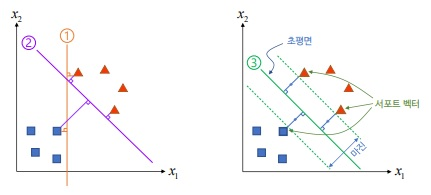  
  
### 오분류 에러 허용하기  
• 주어진 샘플을 완벽하게 두 개의 그룹으로 선형 분리할 수 없을 경우, 오분류 에러를 허용 (Soft margin, C-SVM)    
• C 값은 사용자가 설정하는 파라미터  
• C 값을 크게 설정하면 오분류 에러는 작아지지만 대신 마진이 작아짐  
• C 값을 작게 설정하면 마진이 커지는 대신 오분류 에러가 커질 수 있음  
  
### 비선형 데이터 분리하기  
• SVM은 선형 분류 알고리즘 => BUT 실제 데이터는 비선형으로 분포할 수 있음  
• 비선형 데이터의 차원을 확장하면 선형으로 분리 가능  
• 매핑 함수(mapping function): Φ 𝐱 = 𝐱 𝑑  

<OpenCV SVM API>  
      
• SVM 객체 생성  
cv2.ml.SVM_create() -> retval  
retval:cv2.ml_SVM 객체  
  
• SVM 타입 지정  
cv.ml_SVM.setType(type) -> None  
type: SVM 종류 지정. cv2.ml.SVM_ 으로 시작하는 상수  
=> 타입 종류
cv2.ml.SVM_C_SVC: C-서포트 벡터 분류. 일반적인 n-클래스 분류
문제에서 사용. (파라메터: C)  
cv2.ml.SVM_NU_SVC: ν-서포트 벡터 분류. C_SVC와 비슷하지만 Nu 값
범위가 0~1 사이로 정규화. (파라메터:Nu)  
cv2.ml.SVM_ONE_CLASS: 1-분류 서포트 벡터 머신. 데이터 분포 측정에
사용. (파라메터: C, Nu)  
cv2.ml.SVM_EPS_SVR: ϵ-서포트 벡터 회귀. (파라메터: P, C)  
cv2.ml.SVM_NU_SVR: ν-서포트 벡터 회귀. (파라메터: Nu, C) 
    
• SVM 커널 지정  
cv.ml_SVM.setKernel(kernelType) -> None  
kernelType: 커널 함수 종류 지정. cv2.ml.SVM_ 으로 시작하는 상수  
=> 타입 종류  
cv2.ml.SVM_LINEAR: 선형 커널  
cv2.ml.SVM_POLY: 다항식 커널 (파라메터: Degree, Gamma, Coef0)  
cv2.ml.SVM_RBF: 방사 기저 함수 커널 (파라메터: Gamma)  
cv2.ml.SVM_SIGMOID: 시그모이드 커널 (파라메터: Gamma, Coef0)  
cv2.ml.SVM_CHI2: 지수 카이 제곱 커널 (파라메터: Gamma)  
cv2.ml.SVM_INTER: 히스토그램 교차 커널  
    
#### SVM 자동 학습(k-폴드 교차 검증)  
cv.ml_SVM.trainAuto(samples, layout, responses, kFold=None) -> retval  

samples: 학습 데이터 행렬. numpy.ndarray. shape=(N, d), dtype=numpy.float32  
layout: 학습 데이터 배치 방법. cv2.ROW_SAMPLE 또는 cv2.COL_SAMPLE  
responses: 각 학습 데이터에 대응되는 응답(레이블) 벡터. numpy.ndarray.
shape=(N, ) 또는 (N, 1).dtype=numpy.int32 또는 numpy.float32  
kFold: 교차 검증을 위한 부분 집합 개수  
retval: 학습이 정상적으로 완료되면 True  


In [13]:
import sys
import numpy as np
import cv2


trains = np.array([[150, 200], [200, 250],
                   [100, 250], [150, 300],
                   [350, 100], [400, 200],
                   [400, 300], [350, 400]], dtype=np.float32)
labels = np.array([0, 0, 0, 0, 1, 1, 1, 1])

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
# svm.setKernel(cv2.ml.SVM_LINEAR) # 선형
svm.setKernel(cv2.ml.SVM_RBF) # 비 선형

svm.trainAuto(trains, cv2.ml.ROW_SAMPLE, labels)
print('C:', svm.getC())
print('Gamma:', svm.getGamma())

w, h = 500, 500
img = np.zeros((h, w, 3), dtype=np.uint8)

for y in range(h):
    for x in range(w):
        test = np.array([[x, y]], dtype=np.float32)
        _, res = svm.predict(test)
        ret = int(res[0, 0])

        if ret == 0:
            img[y, x] = (128, 128, 255)  # Red
        else:
            img[y, x] = (128, 255, 128)  # Green

color = [(0, 0, 128), (0, 128, 0)]

for i in range(trains.shape[0]):
    x = int(trains[i, 0])
    y = int(trains[i, 1])
    l = labels[i]

    cv2.circle(img, (x, y), 5, color[l], -1, cv2.LINE_AA)

cv2.imshow('svm', img)
cv2.waitKey()
cv2.destroyAllWindows()


C: 0.1
Gamma: 1.0


## HOG & SVM 필기체 숫자 인식  
  
### HOG 특징 벡터를 이용한 SVM 학습  
• 5x5 셀, 4(10x10)블록 HOG 기술자 (3x3x36=324차원) => 숫자 한 개의 표현  
• 전체 벡터를 하나의 행렬로 묶어서 표현  
• 5000*324 크기의 행렬 1개에 SVM 알고리즘 적용  


In [14]:
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


# 학습 데이터 & 레이블 행렬 생성

digits = cv2.imread('img/digits.png', cv2.IMREAD_GRAYSCALE)

if digits is None:
    print('Image load failed!')
    sys.exit()

h, w = digits.shape[:2]
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9) # 입력크기, 블록크기, stride, 셀크기, 빈수
print('Descriptor Size:', hog.getDescriptorSize())

cells = [np.hsplit(row, w//20) for row in np.vsplit(digits, h//20)]
cells = np.array(cells)
cells = cells.reshape(-1, 20, 20)  # shape=(5000, 20, 20)

desc = []
for img in cells:
    desc.append(hog.compute(img))

train_desc = np.array(desc)
train_desc = train_desc.squeeze().astype(np.float32) # squeeze() : 축을 하나 뺌
train_labels = np.repeat(np.arange(10), len(train_desc)/10)

print('train_desc.shape:', train_desc.shape)
print('train_labels.shape:', train_labels.shape)

# SVM 학습

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setC(2.5)
svm.setGamma(0.50625)

svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)
svm.save('svmdigits.yml') # 학습 결과 파일로 저장

# 사용자 입력 영상에 대해 예측

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(' '):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_desc = hog.compute(test_image).T

        _, res = svm.predict(test_desc)
        print(int(res[0, 0]))

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


Descriptor Size: 324
train_desc.shape: (5000, 324)
train_labels.shape: (5000,)
1
2
3
4
2
7
7


KeyboardInterrupt: 

In [15]:
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


# 학습 데이터 & 레이블 행렬 생성

digits = cv2.imread('img/digits.png', cv2.IMREAD_GRAYSCALE)

if digits is None:
    print('Image load failed!')
    sys.exit()

h, w = digits.shape[:2]
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9)
print('Descriptor Size:', hog.getDescriptorSize())

cells = [np.hsplit(row, w//20) for row in np.vsplit(digits, h//20)]
cells = np.array(cells)
cells = cells.reshape(-1, 20, 20)  # shape=(5000, 20, 20)

desc = []
for img in cells:
    desc.append(hog.compute(img))

train_desc = np.array(desc)
train_desc = train_desc.squeeze().astype(np.float32)
train_labels = np.repeat(np.arange(10), len(train_desc)/10)

# 학습된 SVM 모델 불러오기

svm = cv2.ml.SVM_load('svmdigits.yml')

if svm.empty():
    print('SVM load failed!')
    sys.exit()

# 사용자 입력 영상에 대해 예측

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(' '):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_desc = hog.compute(test_image).T

        _, res = svm.predict(test_desc)
        print(int(res[0, 0]))

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


Descriptor Size: 324
1
2
3


KeyboardInterrupt: 

### HOG&SVM 필기체 숫자 인식에서 정중앙에 숫자를 쓰지 않을 경우?  
=> 인식률 떨어짐.  
=> 학습 데이터 영상 정규화  
  
### 학습 데이터 영상 정규화(Normalization)  
• 학습 데이터 영상과 테스트 데이터 영상의 위치, 크기, 회전 등의 요소를 정규화 → 인식 성능 향상  
• 숫자 영상의 무게 중심이 전체 영상 중앙이 되도록 위치 정규화  

• 영상의 무게 중심 : ( x , y ) = (m10/m00, m01/m00)  

In [5]:
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


def norm_digit(img):
    m = cv2.moments(img)
    cx = m['m10'] / m['m00']
    cy = m['m01'] / m['m00']
    h, w = img.shape[:2]
    aff = np.array([[1, 0, w/2 - cx], [0, 1, h/2 - cy]], dtype=np.float32)
    dst = cv2.warpAffine(img, aff, (0, 0))
    return dst


# 학습 데이터 & 레이블 행렬 생성

digits = cv2.imread('img/digits.png', cv2.IMREAD_GRAYSCALE)

if digits is None:
    print('Image load failed!')
    sys.exit()

h, w = digits.shape[:2]
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9)
print('Descriptor Size:', hog.getDescriptorSize())

cells = [np.hsplit(row, w//20) for row in np.vsplit(digits, h//20)]
cells = np.array(cells)
cells = cells.reshape(-1, 20, 20)  # shape=(5000, 20, 20)

desc = []
for img in cells:
    img = norm_digit(img)
    desc.append(hog.compute(img))

train_desc = np.array(desc)
train_desc = train_desc.squeeze().astype(np.float32)
train_labels = np.repeat(np.arange(10), len(train_desc)/10)

# SVM 학습

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setC(2.5)
svm.setGamma(0.50625)

svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)
#svm.save('svmdigits.yml')

# 사용자 입력 영상에 대해 예측

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(' '):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_image = norm_digit(test_image)
        test_desc = hog.compute(test_image).T

        _, res = svm.predict(test_desc)
        print(int(res[0, 0]))

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


Descriptor Size: 324
1
2


## 4. k-평균 알고리즘  
  
### k-평균(k-means) 알고리즘  
• 주어진 데이터를 k개의 구역으로 나누는 군집화 알고리즘  
  
### 동작 순서  
임의의 K개 중심을 선정  
모든 데이터에 대하여 가장 가까운 중심을 선택  
각 군집에 대해 중심을 다시 계산  
중심이 변경되면 2~3 과정을 반복  
그렇지 않으면 종료  
  
### k-평균 알고리즘을 이용한 컬러 영상 분할  
• 입력 영상의 각 픽셀 값을 색 공간 상의 한 점으로 표현  
(예) RGB 3차원 공간에서의 한 점  
• 색 공간에서 k-평균 알고리즘 수행  
• 각 픽셀 값을 k개의 대표 색상으로 치환 k=16  
  
### K-mean 군집화 함수  
cv2.kmeans(data, K, bestLabels, criteria, attempts, flags, centers=None)
-> retval, bestLabels, centers  
  
data: 학습 데이터 행렬. numpy.ndarray. shape=(N, d), dtype=numpy.float32  
K: 군집 개수  
bestLabels: 각 샘플의 군집 번호 행렬. numpy.ndarray. shape=(N, 1), dtype=np.int32  
criteria: 종료 기준. (type, maxCount, epsilon) 튜플  
attempts: 다른 초기 레이블을 이용해 반복 실행할 횟수  
flags: 초기 중앙 설정 방법. cv2.KMEANS_RANDOM_CENTERS,
cv2.KMEANS_PP_CENTERS, cv2.KMEANS_USE_INITIAL_LABELS 중 하나  
centers: 군집 중심을 나타내는 행렬. np.ndarray. shape=(N, d), dtype=np.float32  
retval: 압축 측정치  


In [17]:
import sys
import numpy as np
import cv2


# 입력 영상 불러오기
src = cv2.imread('img/flowers.jpg')

if src is None:
    print('Image load failed')
    sys.exit()

# 차원 변환 & np.float32 자료형 변환
data = src.reshape((-1, 3)).astype(np.float32)

# K-means 알고리즘
criteria = (cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

for K in range(2, 9):
    print('K:', K)
    ret, label, center = cv2.kmeans(data, K, None, criteria, 10,
                                    cv2.KMEANS_RANDOM_CENTERS)

    # 군집화 결과를 이용하여 출력 영상 생성
    center = np.uint8(center)
    dst = center[label.flatten()]  # 각 픽셀을 K개 군집 중심 색상으로 치환
    dst = dst.reshape((src.shape))

    cv2.imshow('src', src)
    cv2.imshow('dst', dst)
    cv2.waitKey()

cv2.destroyAllWindows()


K: 2
K: 3
K: 4
K: 5
K: 6
K: 7
K: 8
